In [20]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import nltk
%matplotlib inline

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\legion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\legion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\legion\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\legion\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
df = pd.read_csv("SpamAssasin.csv")
df.head()

,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1


In [22]:
df['urls'] = df['body'].str.extractall(r"(http[s]?://\S+)")[0].groupby(level=0).apply(list)
df['urls'] = df['urls'].apply(lambda d: d if isinstance(d, list) else [])
df.tail()

,sender,receiver,date,subject,body,label,urls
5804,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,[http://images.pcdi-homestudy.com/ads/e277/uni...
5805,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,"[http://www.insuranceiq.com/optout/, http://ww..."
5806,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,[http://www.worldbizservices.net/your/mpam/mor...
5807,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,[]
5808,"""wilsonkamela400@netscape.net"" <wilsonkamela50...",ilug@linux.ie,"Wed, 04 Dec 2002 06:07:07",[ILUG] WILSON KAMELA,ATTN:SIR/MADAN \n\n ...,1,[http://www.linux.ie/mailman/listinfo/ilug]


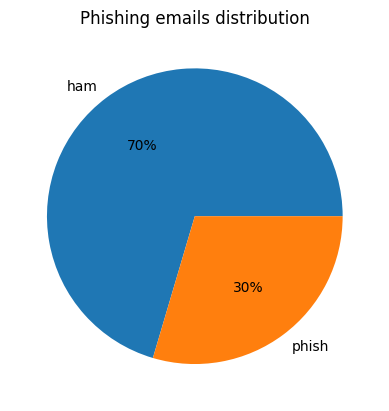

In [23]:
sms = pd.Series(
    df["label"],
).value_counts(sort=True)
sms.plot(kind="pie", labels=["ham", "phish"], autopct="%1.0f%%")

plt.title("Phishing emails distribution")
plt.ylabel("")
plt.show()

In [24]:
X = df.drop("label", axis=1)
Y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

undersampler = RandomUnderSampler(sampling_strategy="majority", random_state=42)

X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["label"] = y_resampled

df_resampled.to_csv("SpamAssasin_preprocessed.csv", index=False)

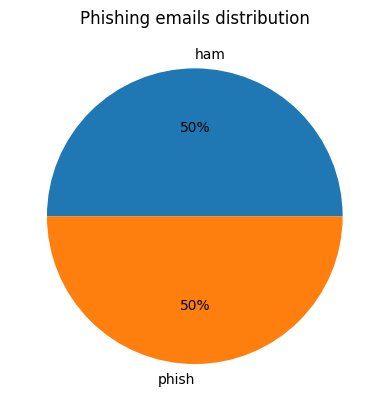

In [25]:
email = pd.Series(
    df_resampled["label"],
).value_counts(sort=True)
email.plot(kind="pie", labels=["ham", "phish"], autopct="%1.0f%%")

plt.title("Phishing emails distribution")
plt.ylabel("")
plt.show()